In [67]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [68]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

BATCH_SIZE = 64
LR = 0.001

In [69]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [70]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [71]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

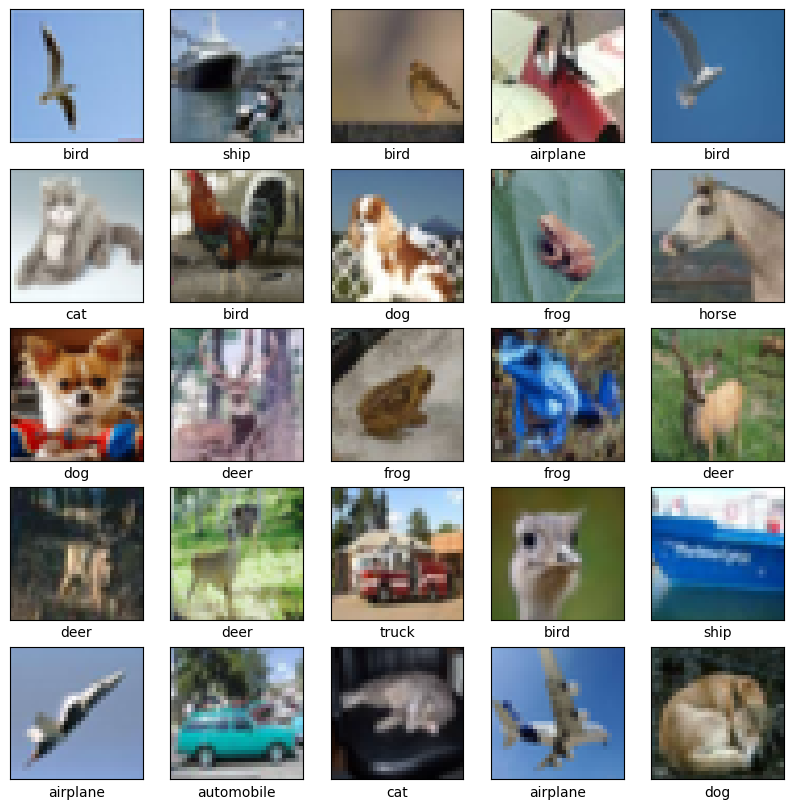

In [72]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    index = np.random.randint(len(y_train))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[index][0]])
plt.show()

In [73]:
model = tf.keras.applications.resnet.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
    classes=10,
    classifier_activation='softmax'
)

In [74]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 38, 38, 3)         │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 16, 16, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 16, 16, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 16, 16, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 18, 18, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 8, 8, 64)          │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 8, 8, 64)          │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 8, 8, 64)          │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 8, 8, 256)         │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 8, 8, 256)         │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy",]
            )

In [76]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H%M%S")
current_time

checkpoint_path =  f"checkpoints/{current_time}_batchsize{BATCH_SIZE}_LR{LR}_resnet50"
os.makedirs(checkpoint_path, exist_ok=True)

callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(checkpoint_path, "checkpoint.keras"),
        monitor='val_accuracy',
        save_best_only=True,
    ),
    tf.keras.callbacks.CSVLogger( 
        os.path.join(checkpoint_path, 'training.csv'), 
        separator=',', # 
        append=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
    ),

]

In [16]:
history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test),
                    callbacks=callbacks,
                    batch_size=BATCH_SIZE)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 129ms/step - accuracy: 0.9519 - loss: 0.1390 - val_accuracy: 0.7325 - val_loss: 1.1964
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.9505 - loss: 0.1468 - val_accuracy: 0.7018 - val_loss: 1.4141


In [77]:
import tensorflow as tf

In [79]:
model = tf.keras.models.load_model("checkpoints/215209_batchsize64_LR0.001_resnet50/checkpoint.keras")

In [80]:
X_test.shape

(10000, 32, 32, 3)

In [81]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7368 - loss: 1.0992


[1.0875554084777832, 0.737500011920929]

In [82]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [83]:
y_pred

array([3, 8, 0, ..., 5, 1, 7])

In [89]:
from helper_function import make_confusion_matrix

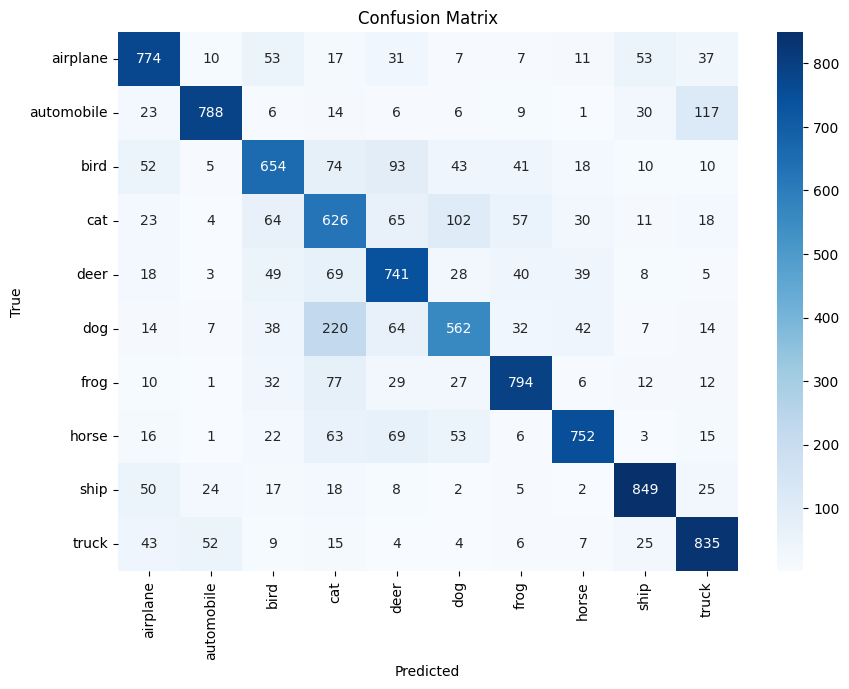

In [85]:
make_confusion_matrix(y_test.squeeze(axis=-1), y_pred, classes=class_names)

In [116]:
import pandas as pd
df = pd.read_csv('checkpoints/215209_batchsize64_LR0.001_resnet50/training.csv')

In [117]:
import matplotlib.pyplot as plt
def plot_loss_curves(csv_path):
    """
    Plots training and validation loss and accuracy curves from a CSV file.

    Args:
        csv_path (str): Path to the CSV file containing training metrics.
    """
    required_columns = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Plot training and validation loss
    plt.figure(figsize=(10, 10))

    # Loss Plot
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['loss'], label='Training Loss', color='blue', linewidth=2)
    plt.plot(df.index, df['val_loss'], label='Validation Loss', color='orange', linewidth=2)
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)

    # Accuracy Plot
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    plt.plot(df.index, df['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

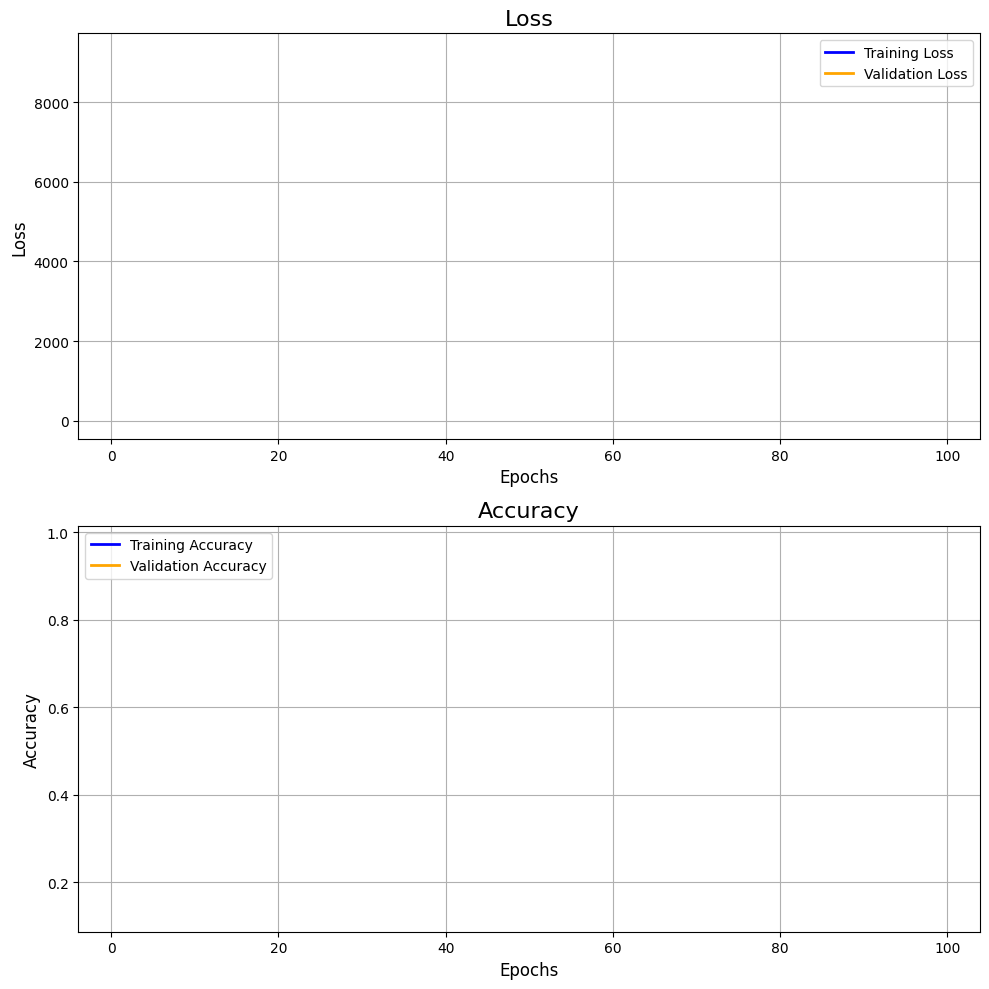

In [118]:
plot_loss_curves(df)

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('checkpoints/190354_batchsize32_LR0.001/training.csv')

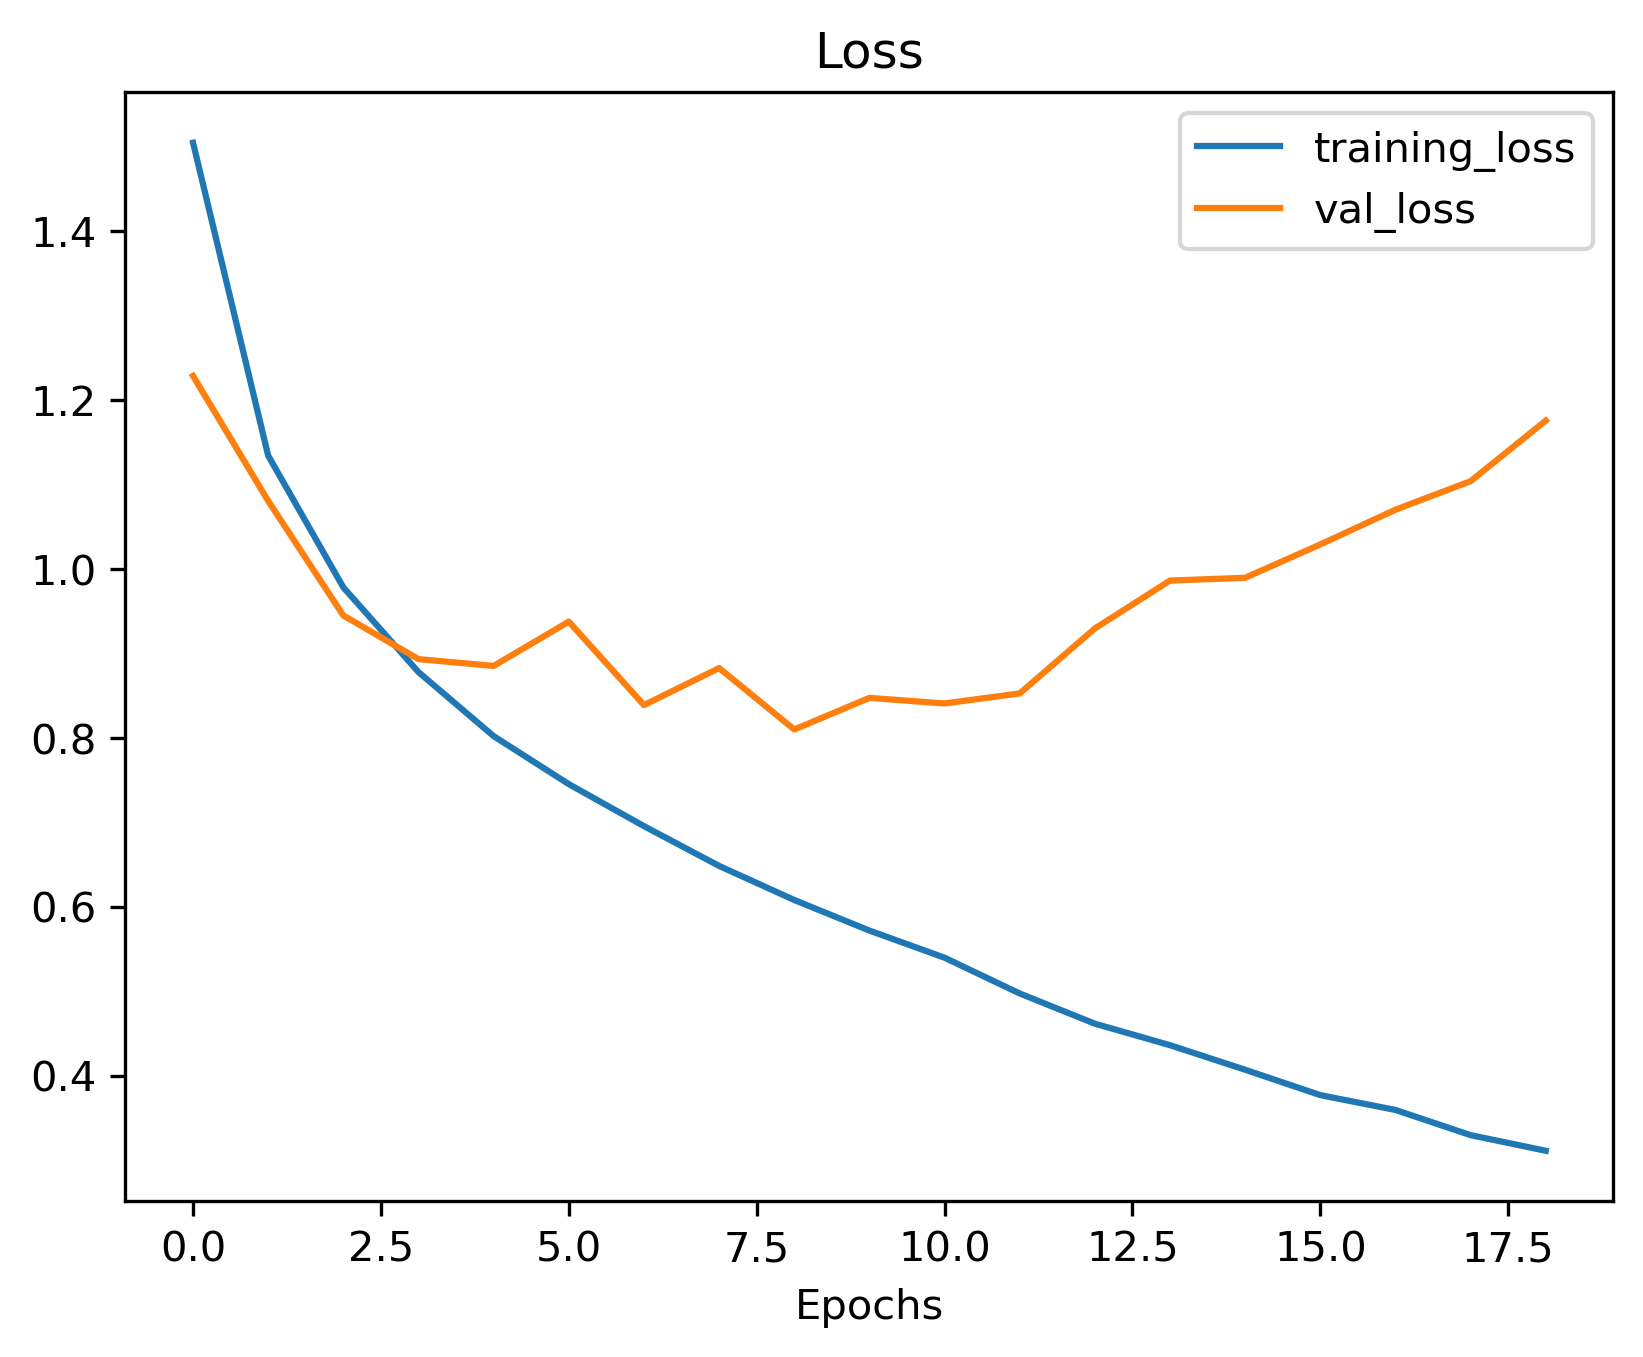

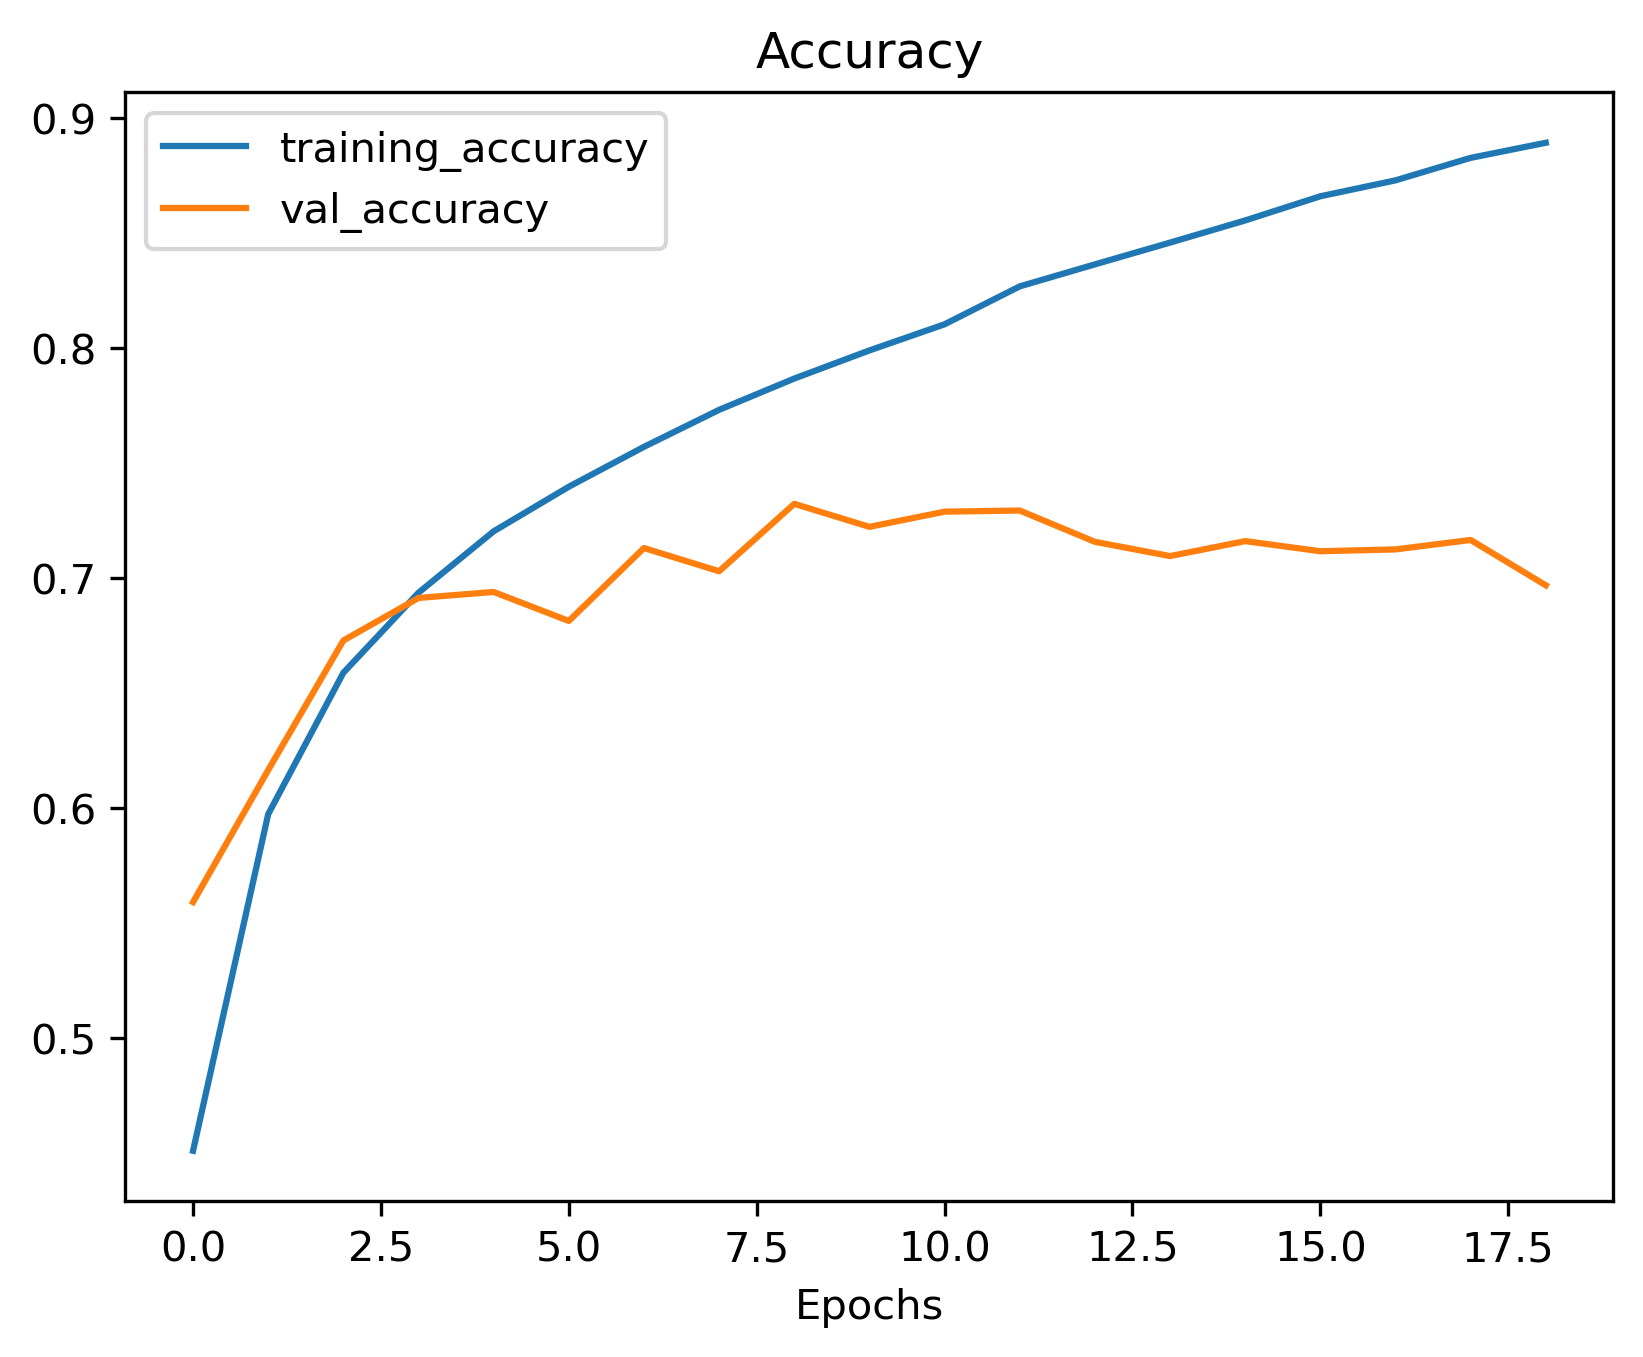

In [17]:
plot_loss_curves(df)

In [21]:
df = pd.read_csv('checkpoints/190609_batchsize64_LR0.001/training.csv')

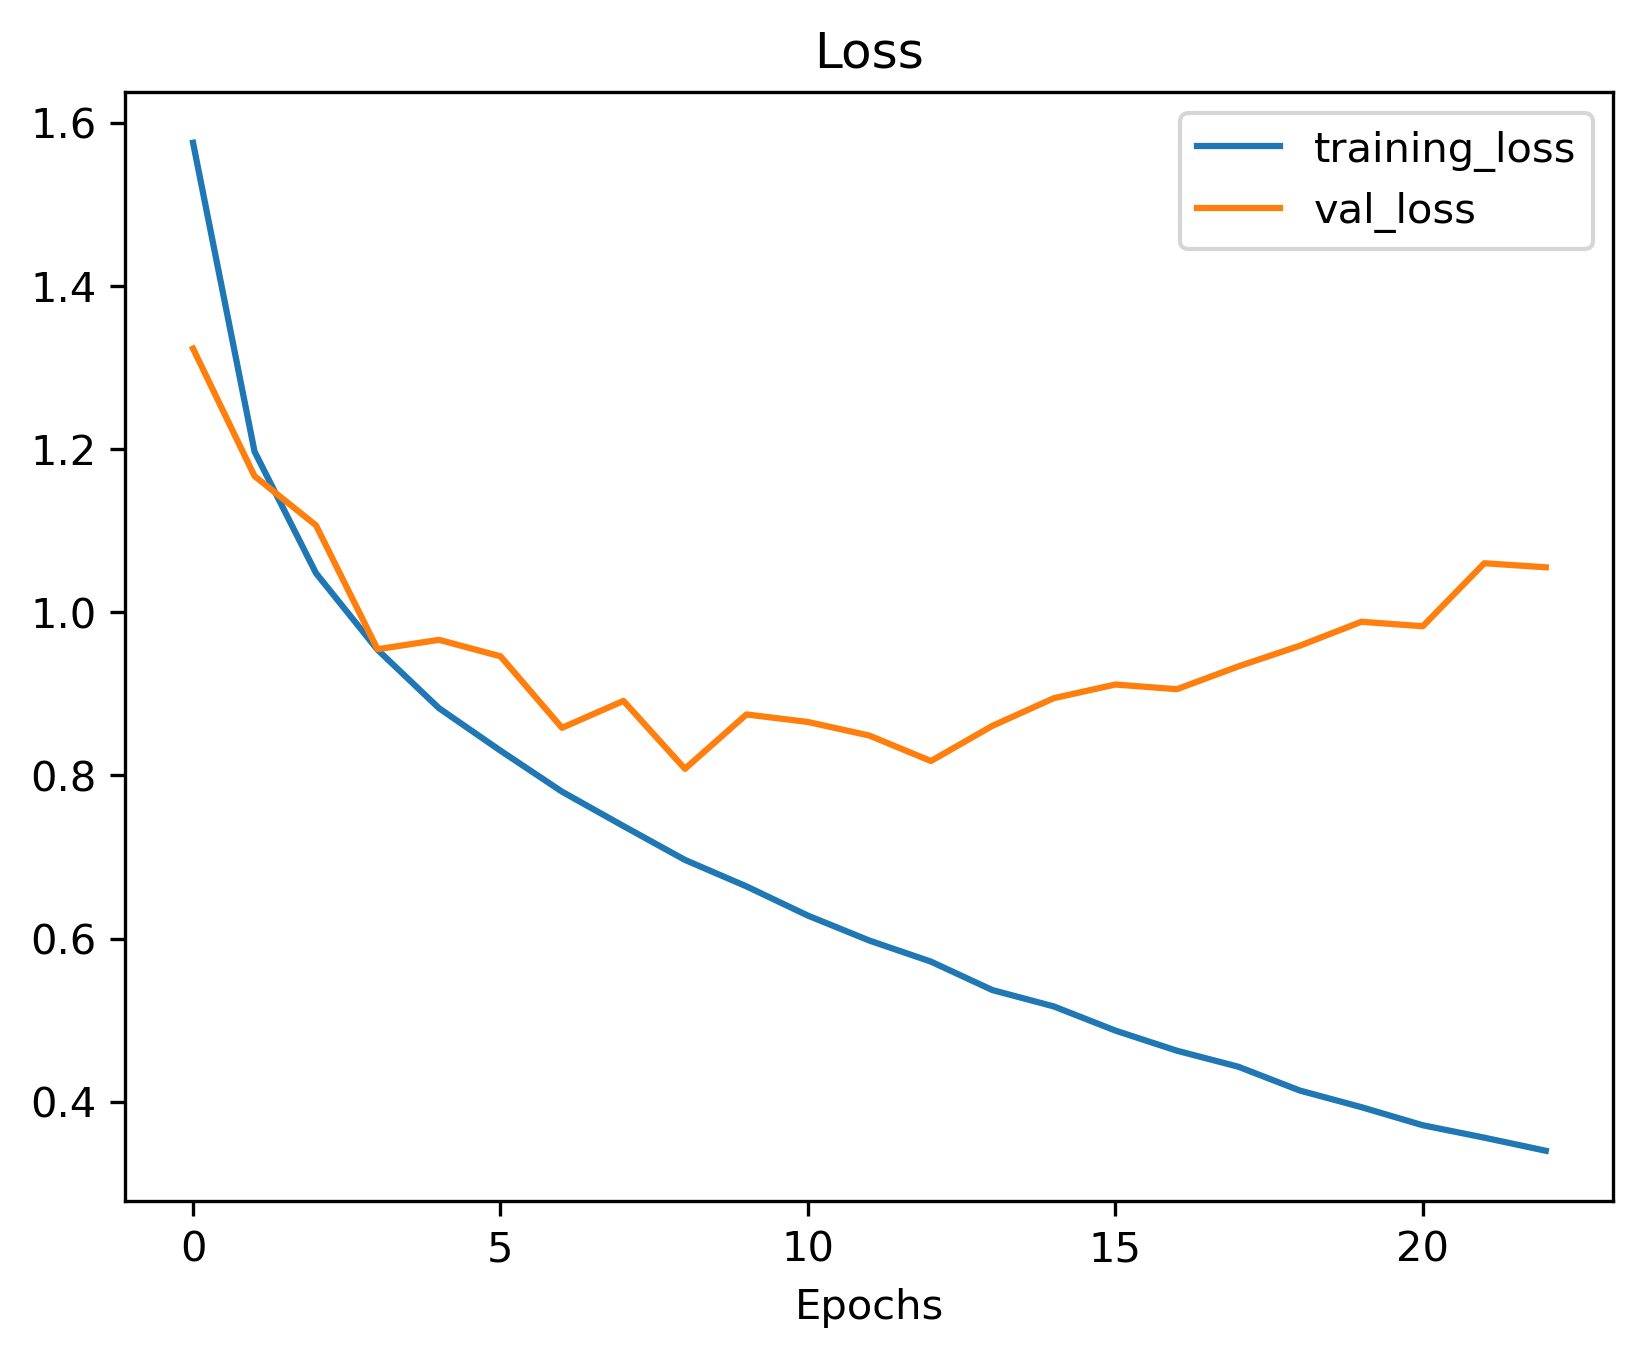

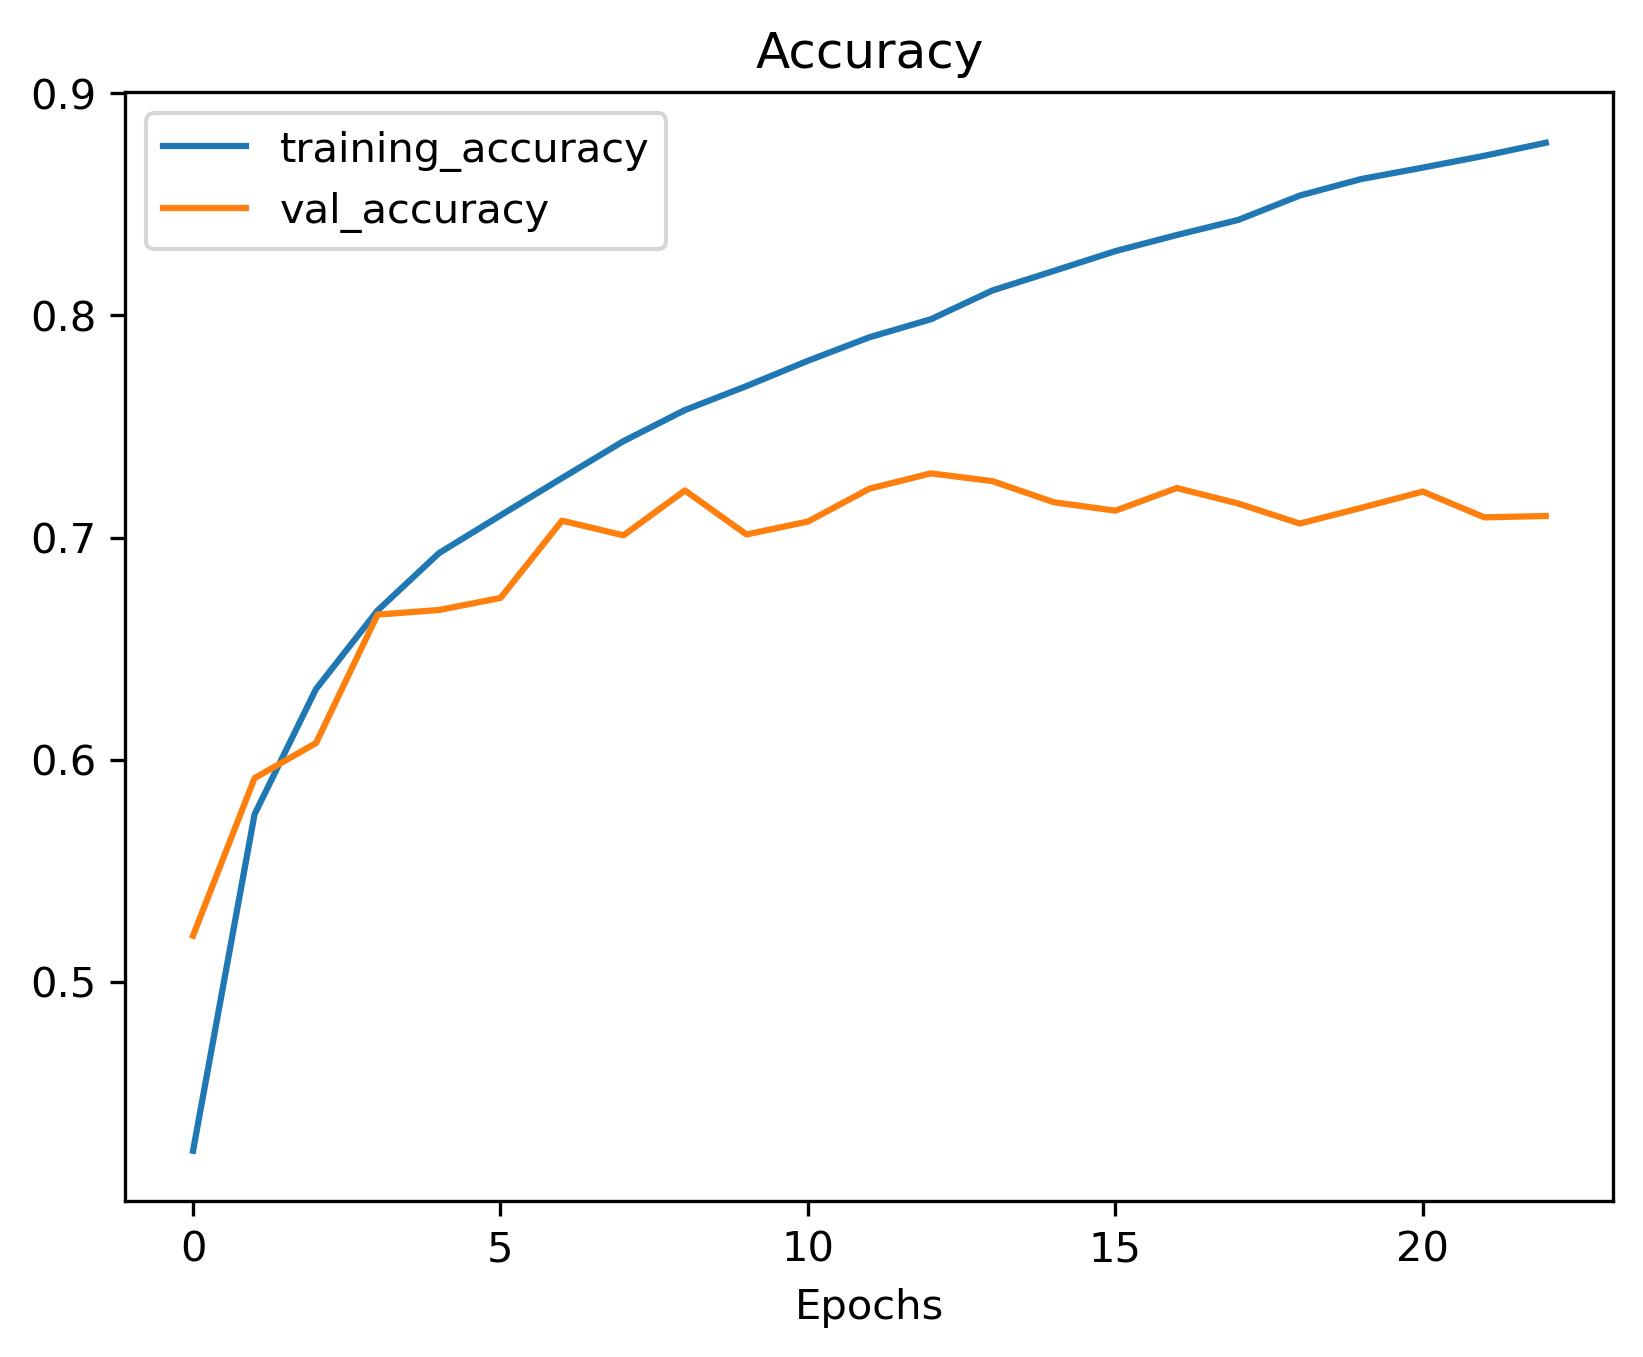

In [22]:
plot_loss_curves(df)

In [25]:
df = pd.read_csv('checkpoints/224856_batchsize64_LR0.001_reduceLROnPlateau/training.csv')

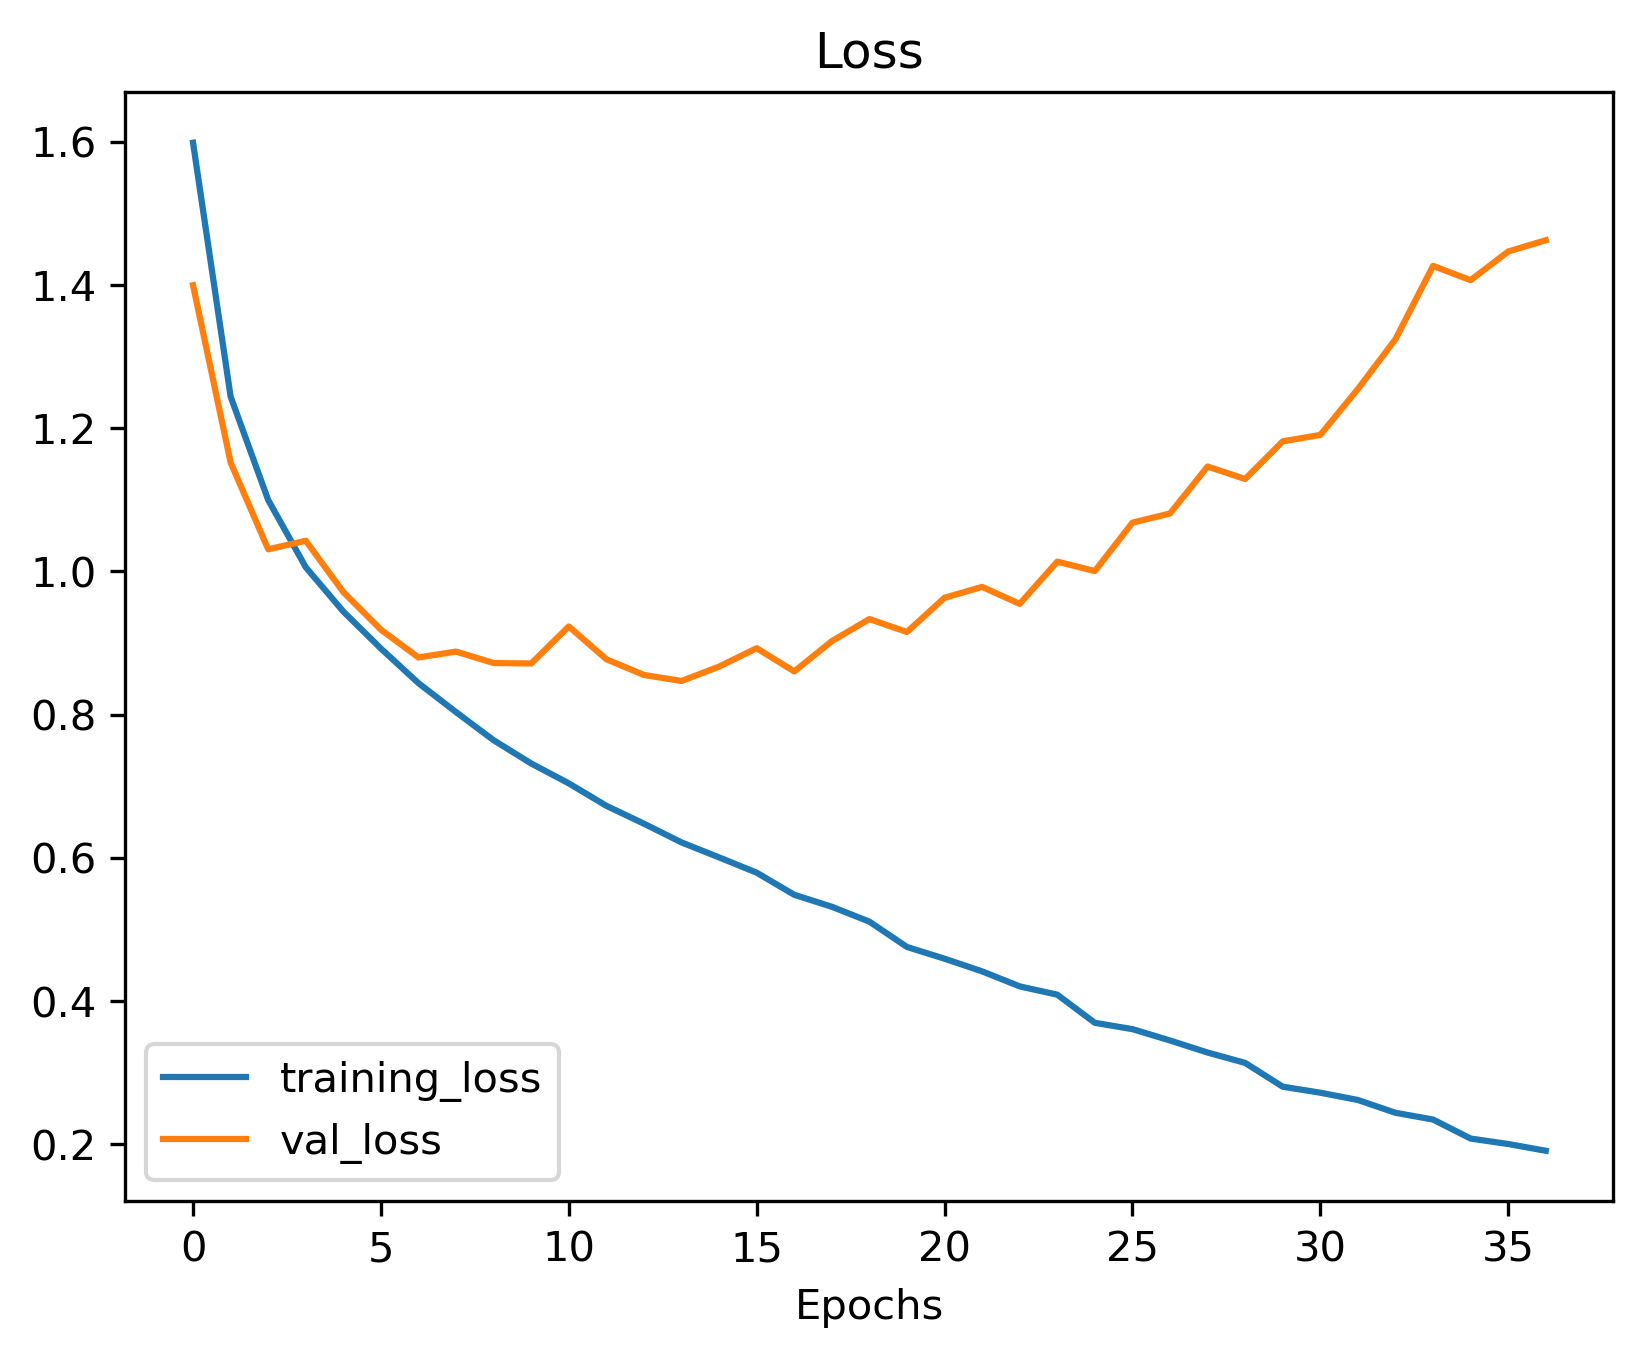

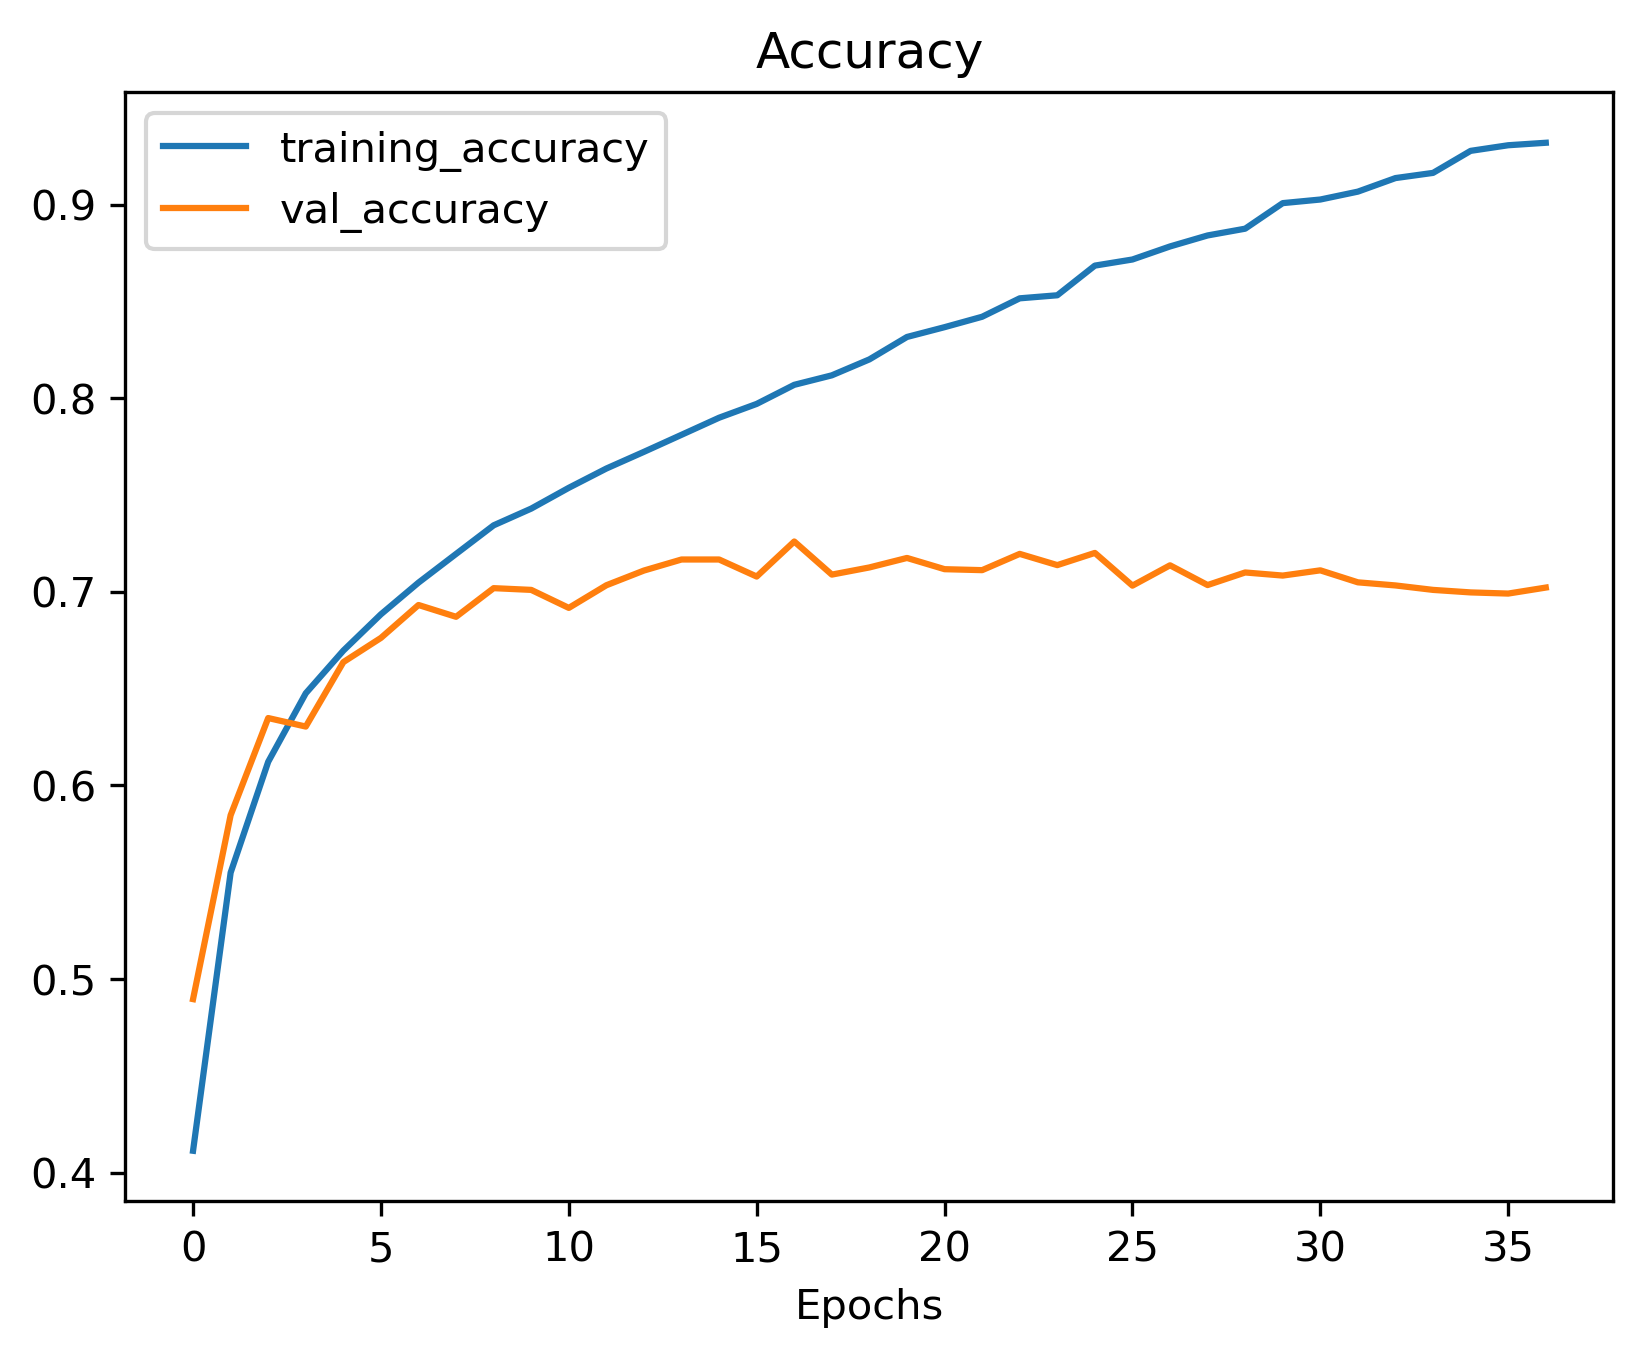

In [26]:
plot_loss_curves(df)